In [1]:
library(latex2exp)
library(igraph)
library(ggplot2)
library(pracma)
library(scales)

Warning message:
"package 'latex2exp' was built under R version 3.6.3"Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'pracma' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.2"

In [2]:
library(data.table)

Warning message:
"package 'data.table' was built under R version 3.6.2"

### Question 1

In [3]:
path = "C:\\Users\\lpott\\Desktop\\UCLA\\ECENGR232E-80\\project_2\\facebook\\facebook_combined.txt.gz"
g_facebook = as.matrix(read.table(path, header = FALSE, sep = " ")) + 1
g_fb = graph_from_edgelist(g_facebook, directed = FALSE)

png 
  3

png 
  2

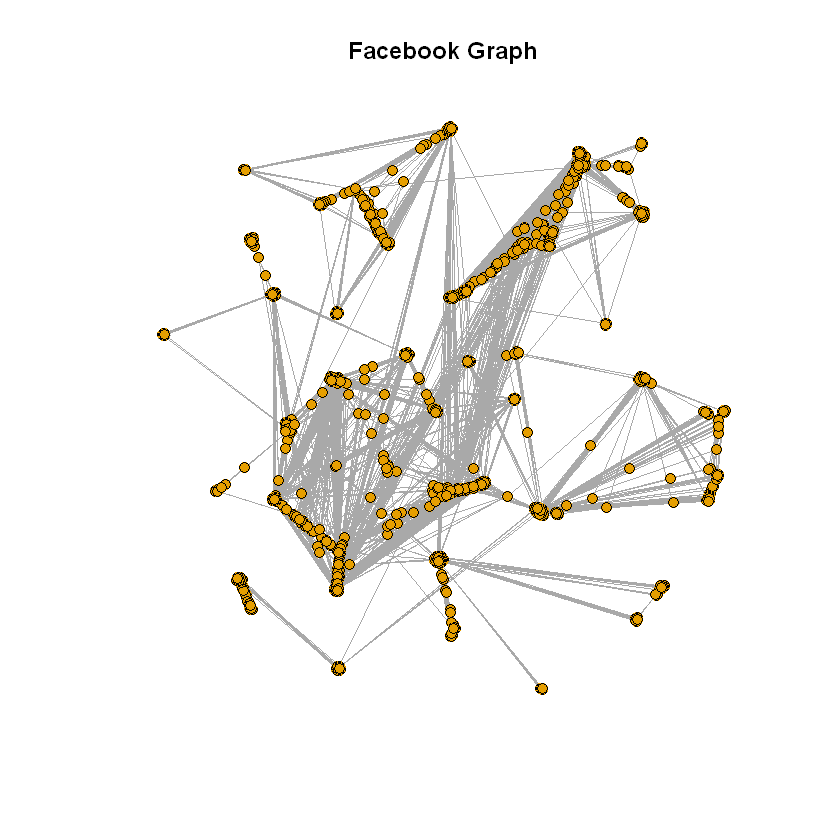

In [4]:
plot(g_fb,
     vertex.size=4,
     edge.width=.1,
     margin=c(0,0,0,0),
     main="Facebook Graph",
     vertex.label=NA)

dev.copy(png,'images\\question1.png')
dev.off()

### Question 1.1

In [5]:
N_edges = ecount(g_fb)
N_nodes <- vcount(g_fb)

In [6]:
cat("Number of Nodes: ",N_nodes,"\n")
cat("Number of Edges: ",N_edges,"\n")

Number of Nodes:  4039 
Number of Edges:  88234 


### Question 1.2

In [7]:
is_conn <- is_connected(g_fb)
cat("The graph is fully connected: ",is_conn,"\n")

The graph is fully connected:  TRUE 


### Question 2

In [8]:
diam = diameter(g_fb)
cat("The graph diameter is: ",diam)

The graph diameter is:  8

### Question 3

In [9]:
deg_dist <- degree_distribution(g_fb)

In [10]:
cat("The mean degree: ",mean(deg_dist),"\n")

The mean degree:  0.0009560229 


png 
  3

png 
  2

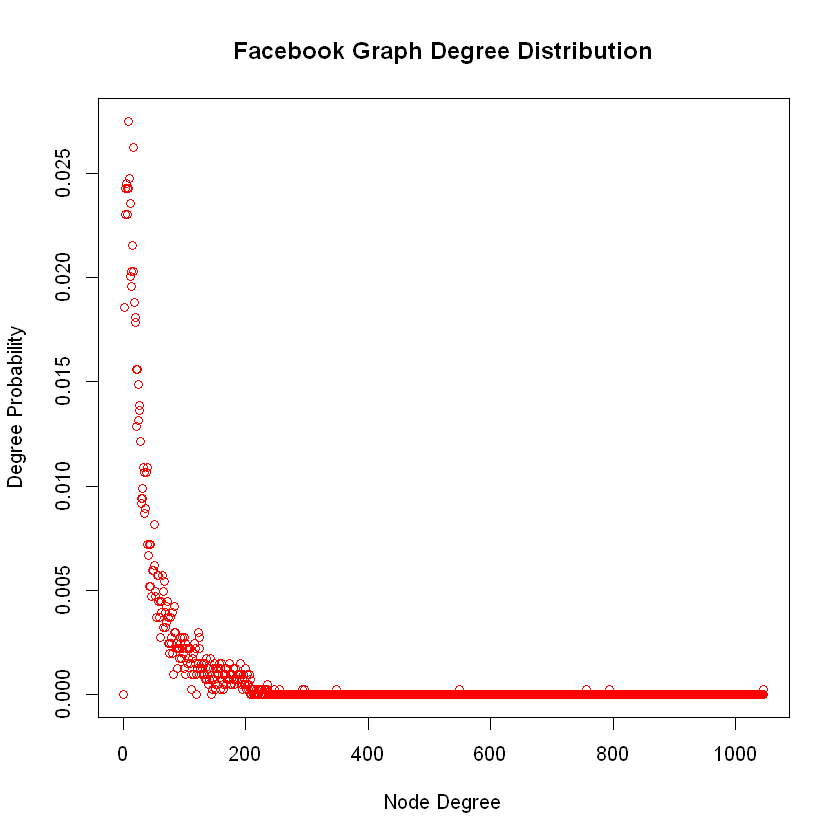

In [11]:
plot(degree_distribution(g_fb),
     col='red',
     main='Facebook Graph Degree Distribution',
     xlab="Node Degree",
     ylab="Degree Probability")

dev.copy(png,'images\\question3.png')
dev.off()

### Question 4

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 819 rows containing non-finite values (stat_smooth)."

png 
  3

png 
  2

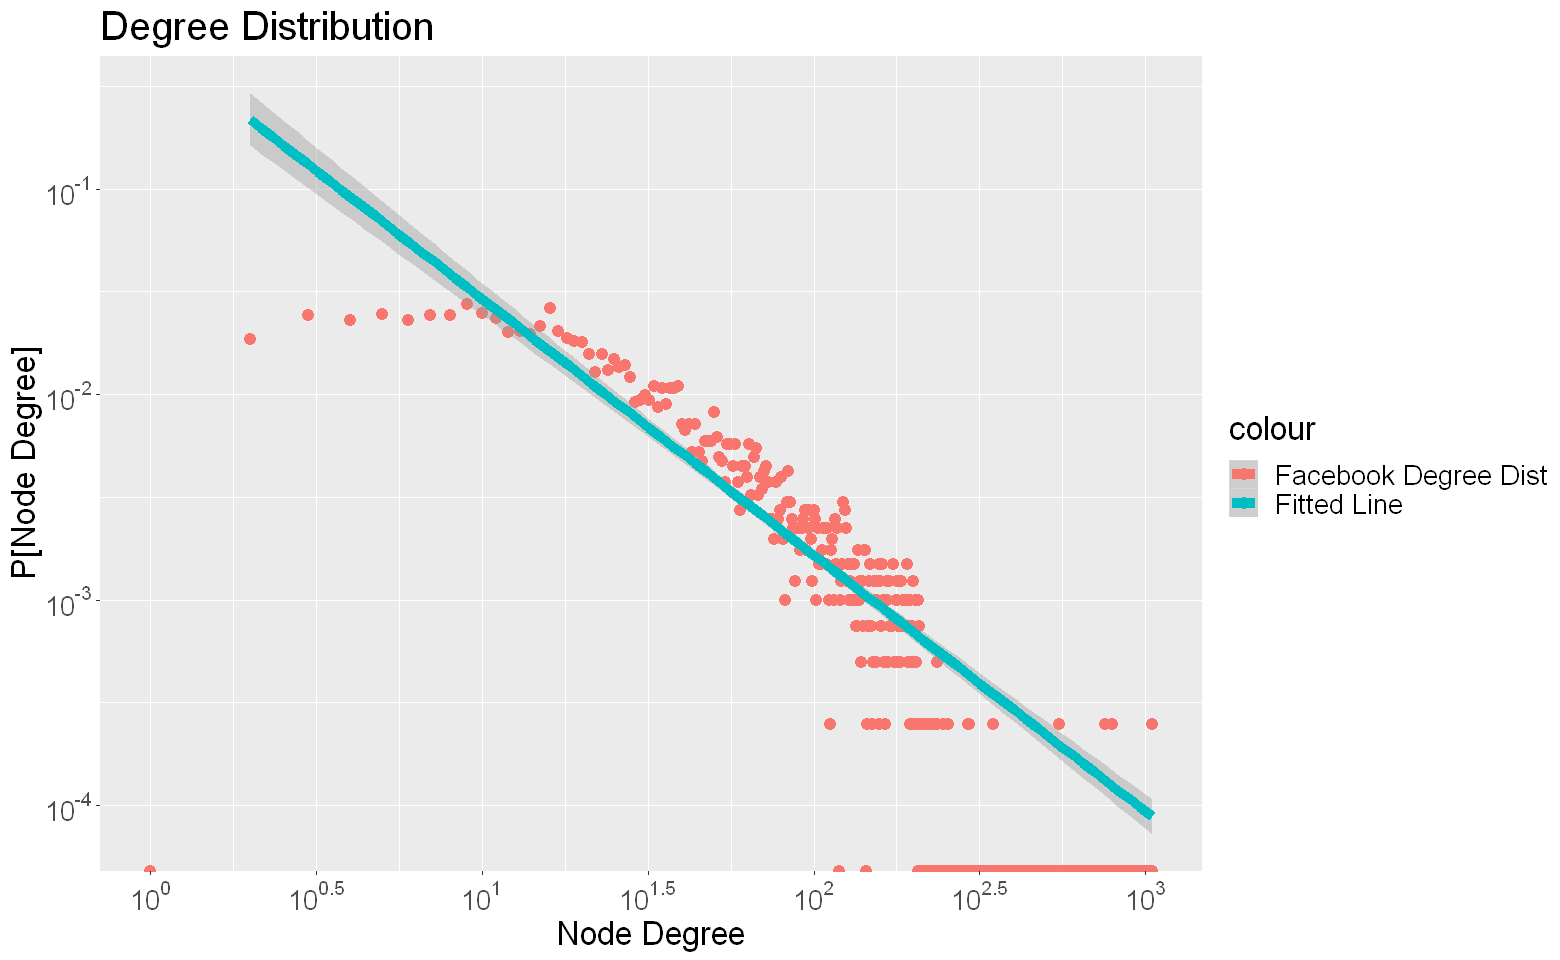

In [12]:
dg_dist <- degree_distribution(g_fb)
scatterplot <- ggplot() +
geom_point(aes(x=seq_along(dg_dist),y=dg_dist,colour='Facebook Degree Dist'),size=3) +
geom_smooth(aes(x=seq_along(dg_dist),y=dg_dist,colour='Fitted Line'),method = "lm",size=3) +
scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
ylab("P[Node Degree]") + xlab("Node Degree") + labs(title="Degree Distribution") +
theme(text = element_text(size=20))

options(repr.plot.width=13, repr.plot.height=8)
plot(scatterplot)
dev.copy(png,'images\\question4.png',width = 800, height = 600)
dev.off()

In [13]:
df <- data.frame(x=log10(seq_along(deg_dist)),y=log10(deg_dist))
head(df)

x,y
0.0000000,-Inf
0.3010300,-1.731213
0.4771213,-1.615048
0.6020600,-1.637791
0.6989700,-1.610639
0.7781513,-1.637791


In [14]:
lm(y~x,data=df[!is.infinite(df$y),])


Call:
lm(formula = y ~ x, data = df[!is.infinite(df$y), ])

Coefficients:
(Intercept)            x  
    -0.2871      -1.2475  


### Question 5

In [15]:
g_subset <- induced_subgraph(g_fb,
                             c(1,neighbors(g_fb,1))
                            )

In [16]:
N_nodes <- vcount(g_subset)
N_edges <- ecount(g_subset)
cat("Number of nodes in subset: ",N_nodes,"\n")
cat("Number of edges in subset: ",N_edges,"\n")

Number of nodes in subset:  348 
Number of edges in subset:  2866 


In [17]:
for (i in seq_along(V(g_subset))) {
    V(g_subset)[i]$color = 'red'
}
V(g_subset)[1]$color = 'green'

png 
  3

png 
  2

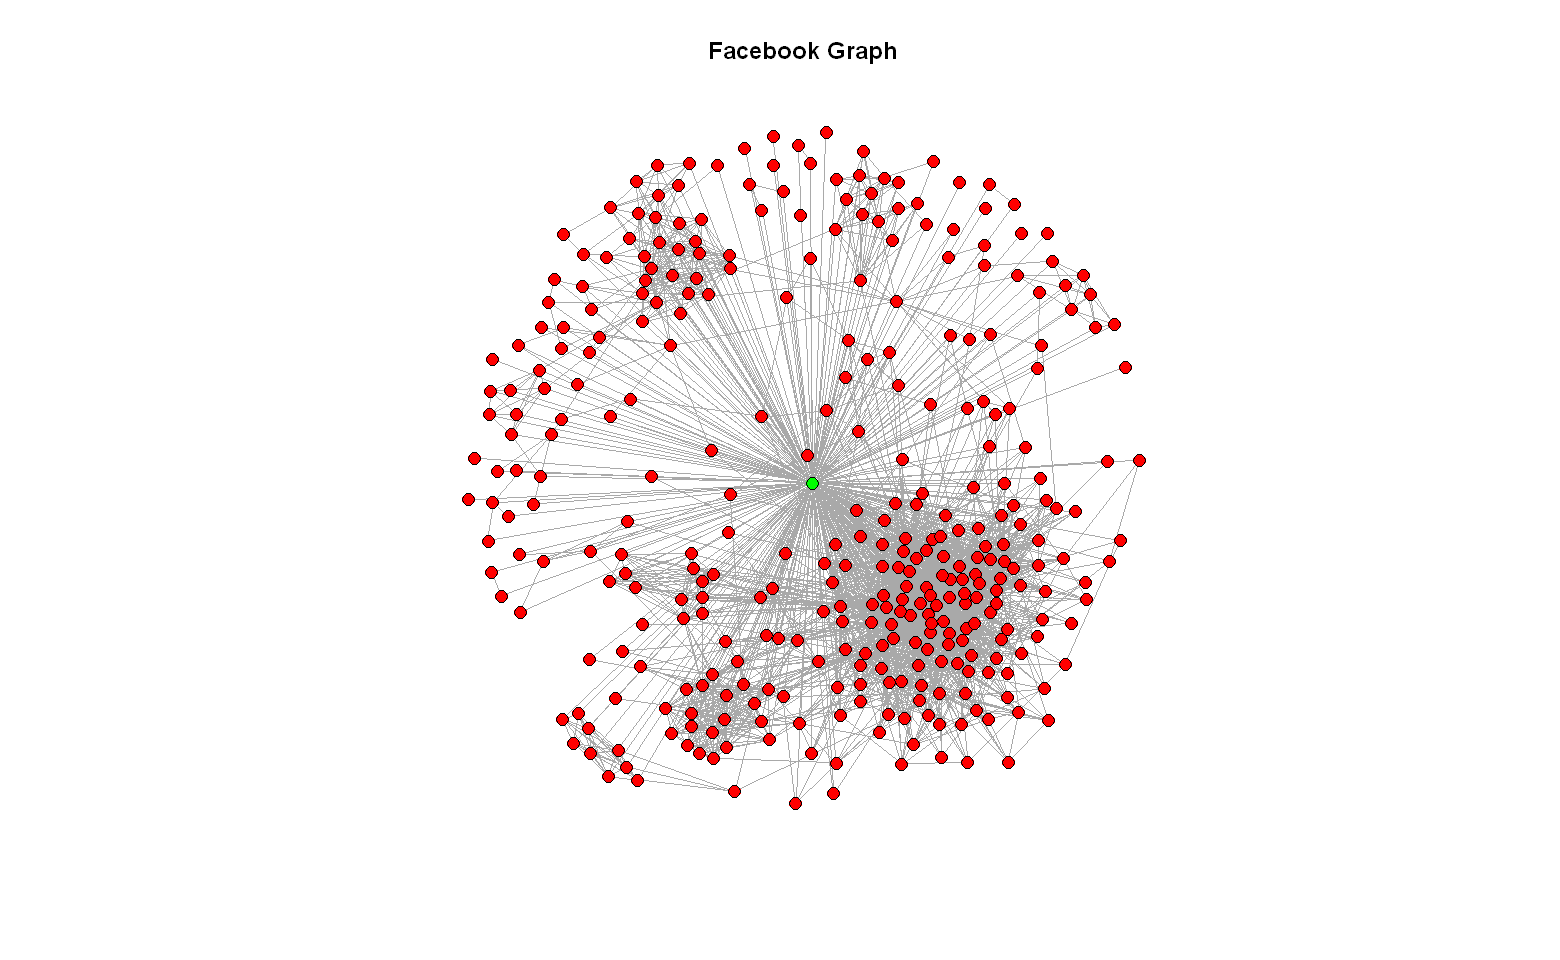

In [18]:

plot(g_subset,
     vertex.size=4,
     edge.width=.1,
     margin=c(0,0,0,0),
     main="Facebook Graph",
     vertex.label=NA)
dev.copy(png,'images\\question5.png',width = 800, height = 800)
dev.off()

### Question 6

In [19]:
diam <- diameter(g_subset)
cat("The diameter is ",diam,"\n")

The diameter is  2 


### Question 8
* This means that every node is connected through the code node, hence all shortest paths go through the core node!

In [20]:
N_corenodes <- sum(degree(g_fb) > 200)
cat("There are",N_corenodes,"core nodes\n")

There are 40 core nodes


### Question 8 

In [21]:
node_ids <- c(1,108,349,484,1087)

In [22]:
##subgraphs <- make_ego_graph(g_fb, 1, nodes=V(g_fb)[node_ids])

In [23]:
V(g_fb)[1087]

+ 1/4039 vertex, from b113c3e:
[1] 1087

[1] "images\\Question8_1_edgebtw_.png"
[1] "images\\Question8_1_fastgreedy_.png"


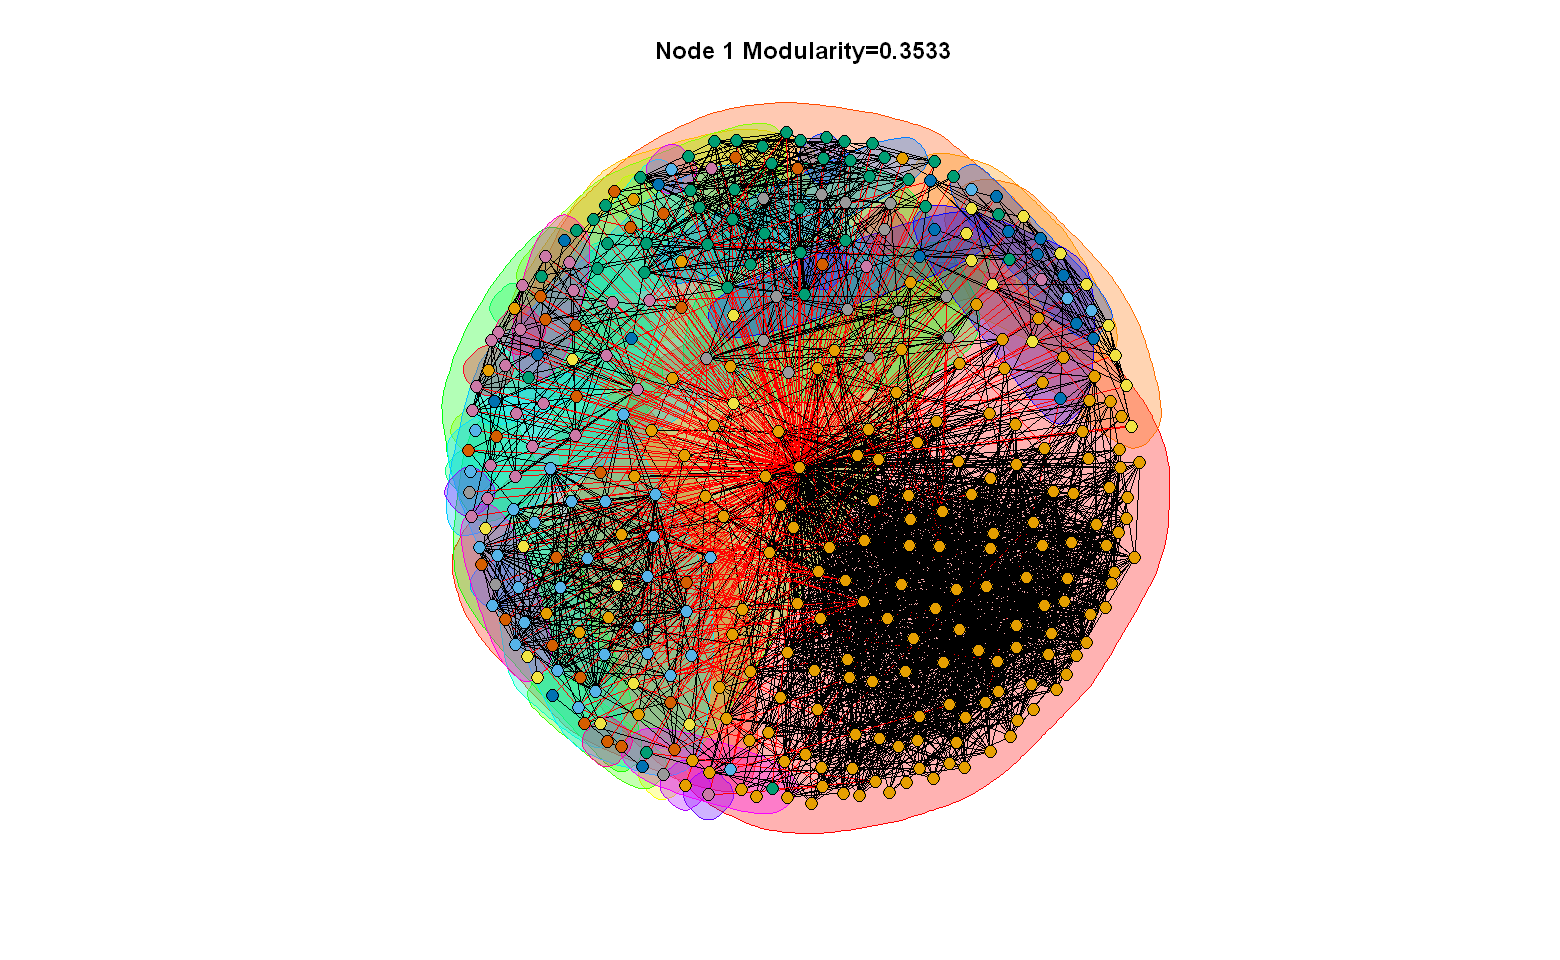

[1] "images\\Question8_1_infomap_.png"


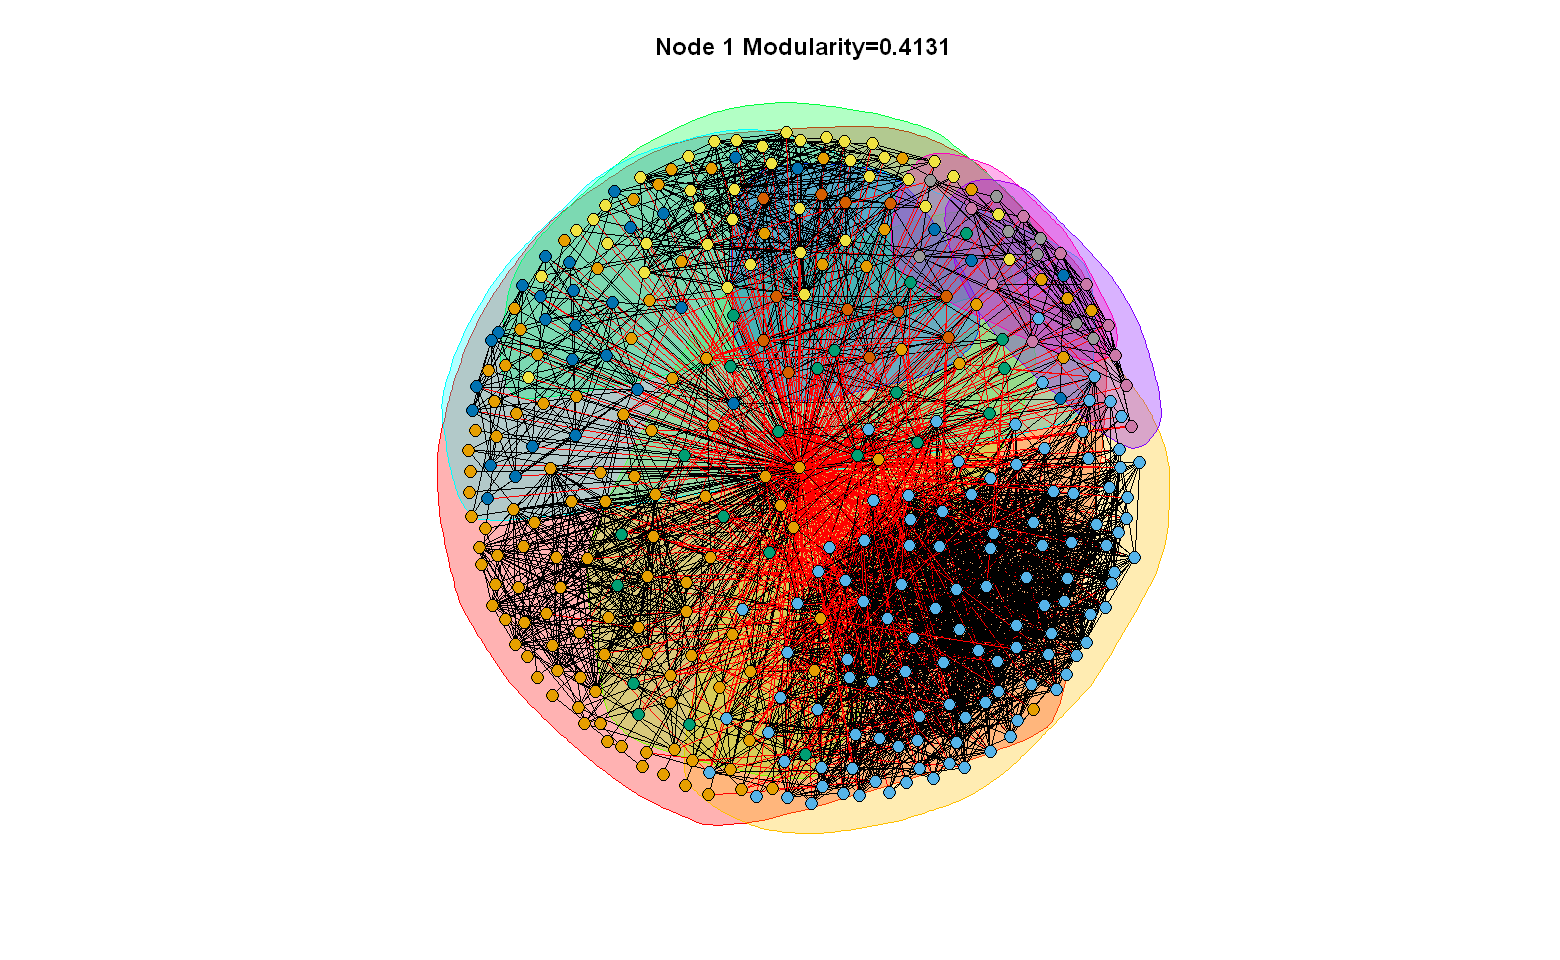

[1] "images\\Question8_108_edgebtw_.png"


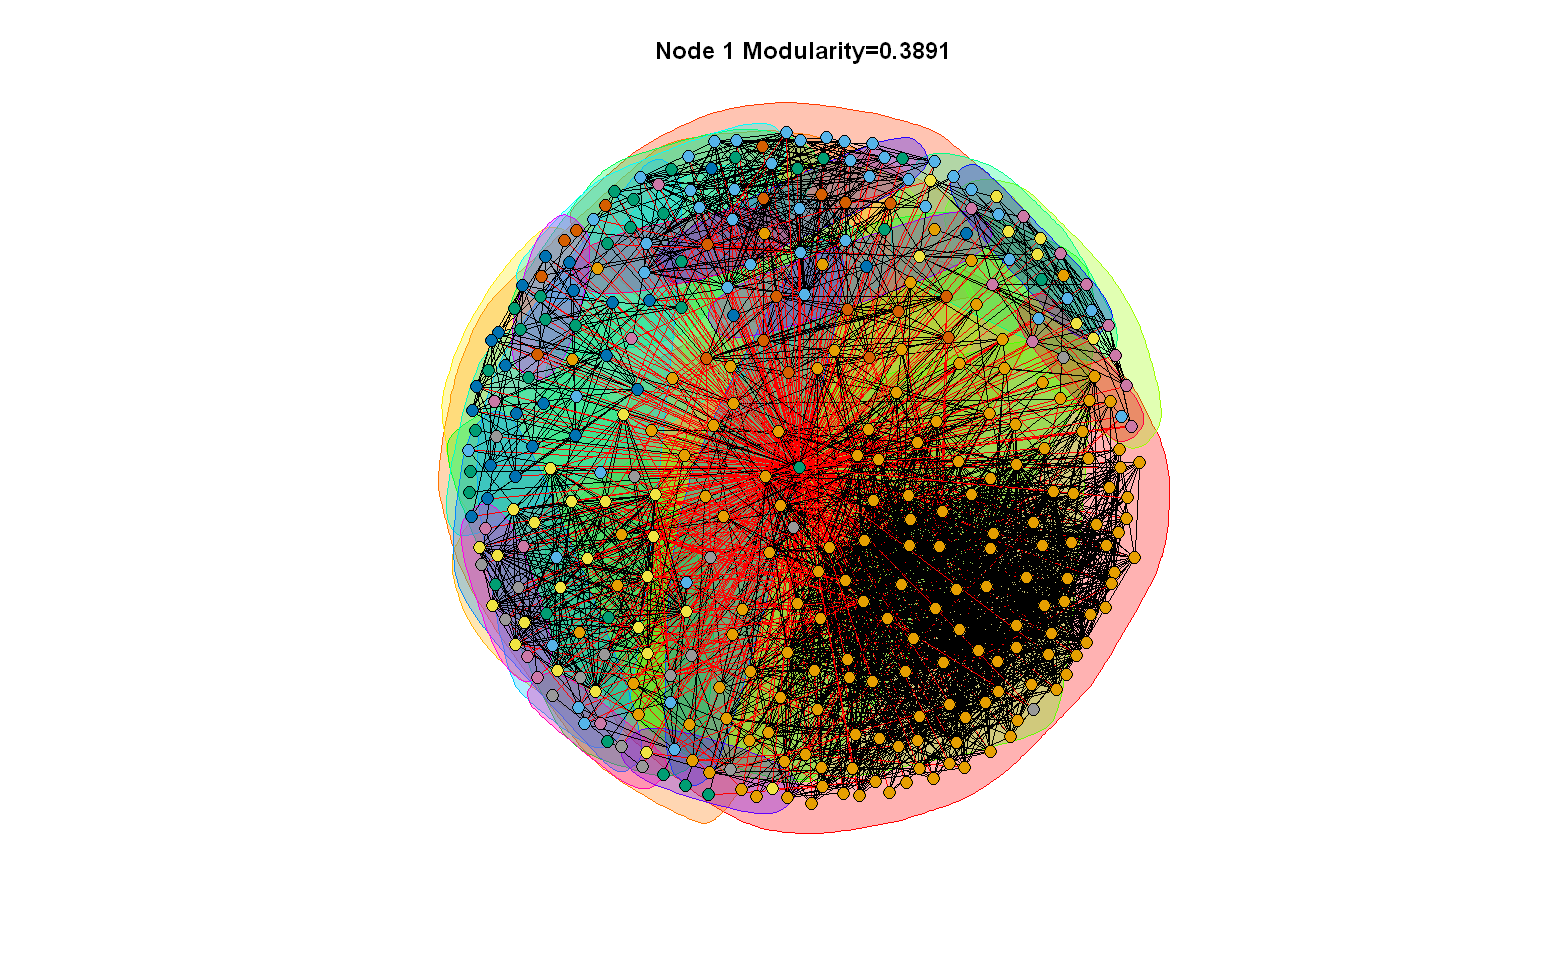

[1] "images\\Question8_108_fastgreedy_.png"


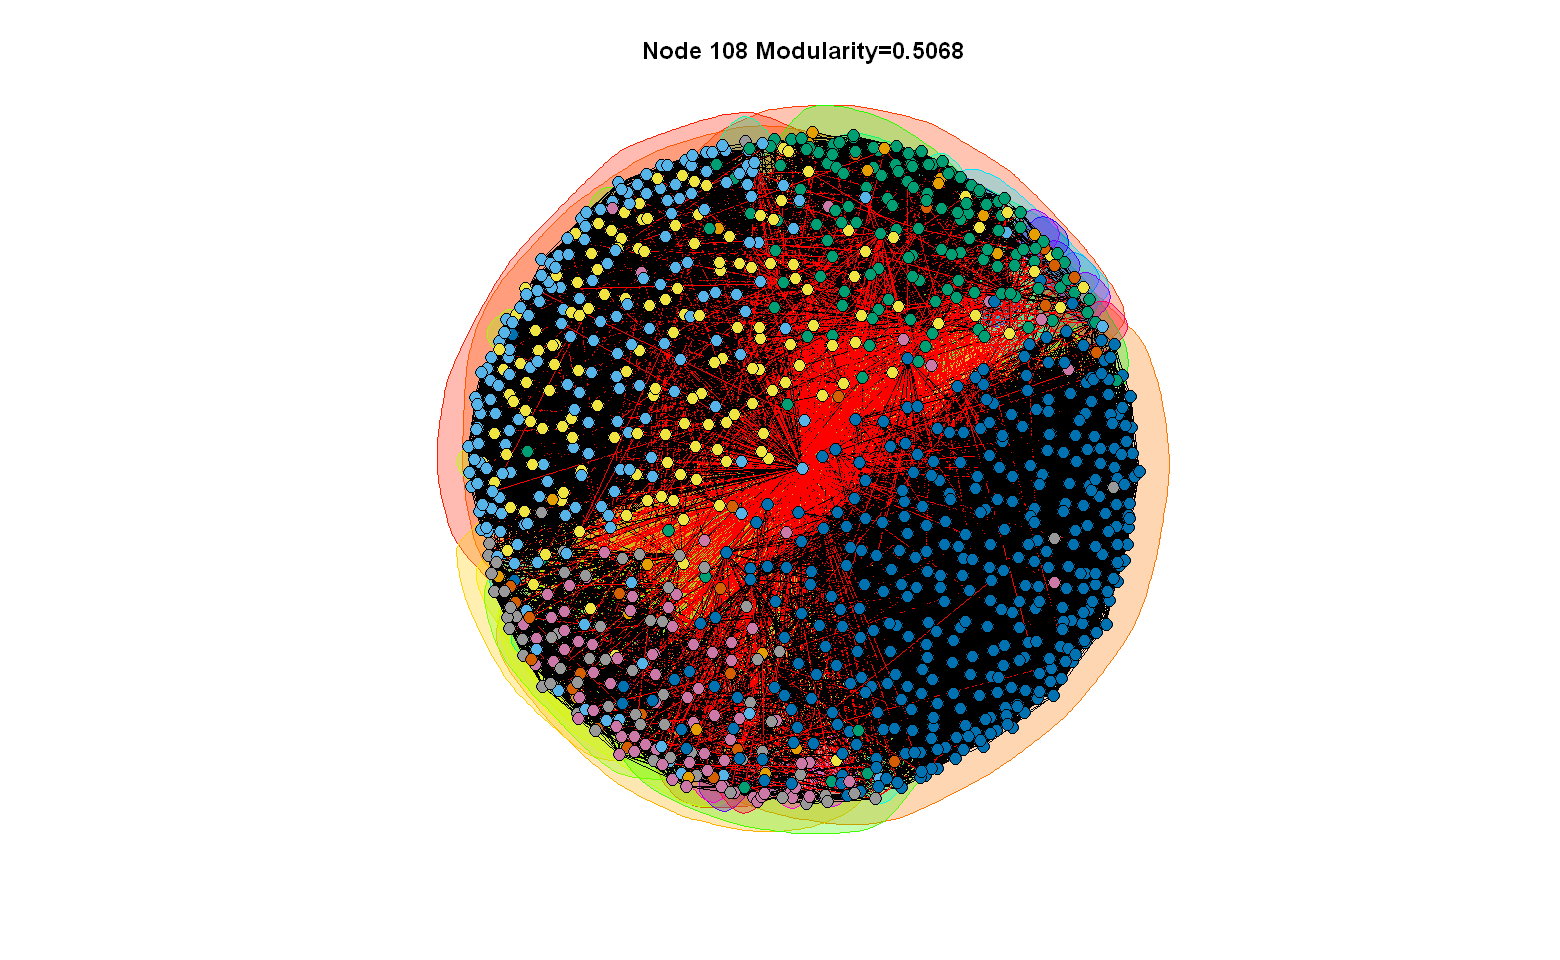

[1] "images\\Question8_108_infomap_.png"


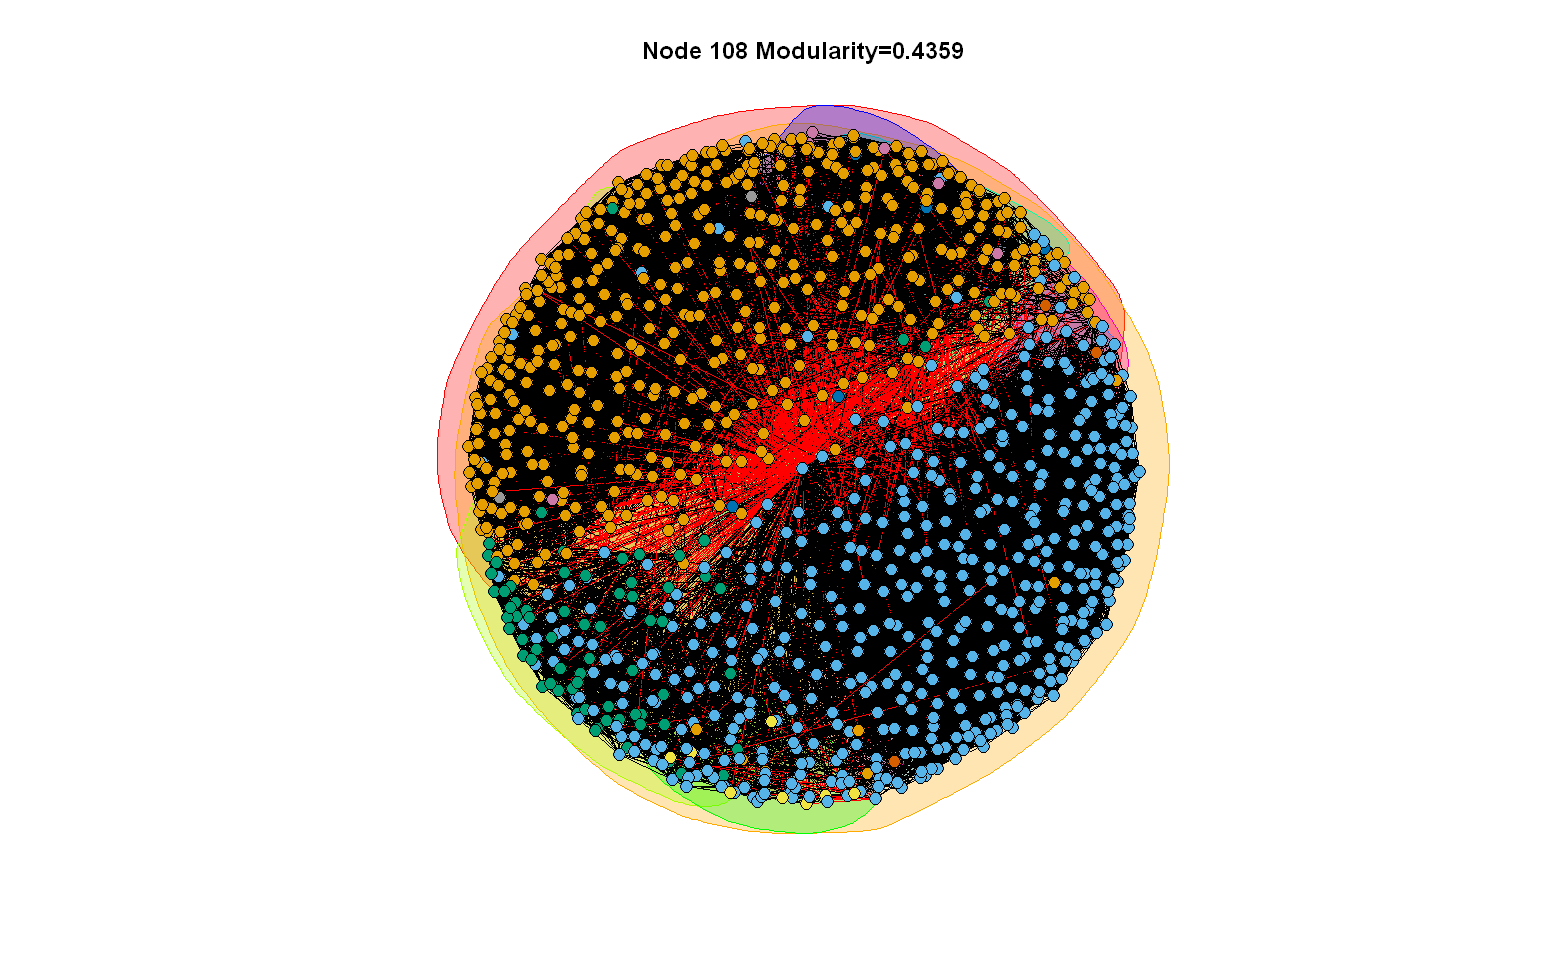

[1] "images\\Question8_349_edgebtw_.png"


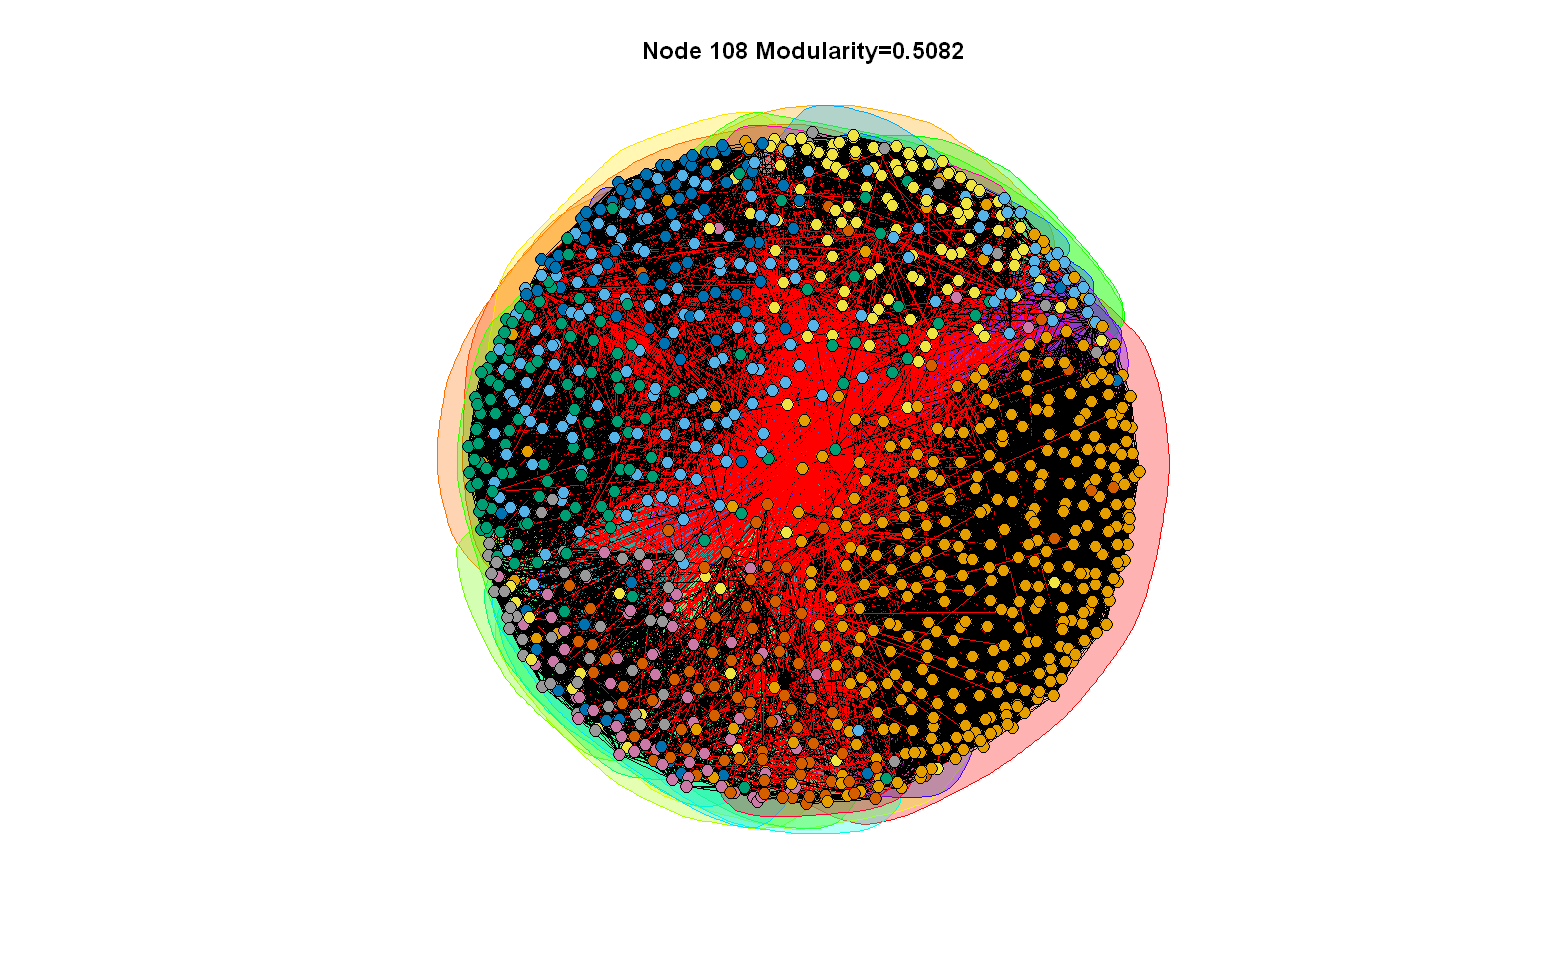

[1] "images\\Question8_349_fastgreedy_.png"


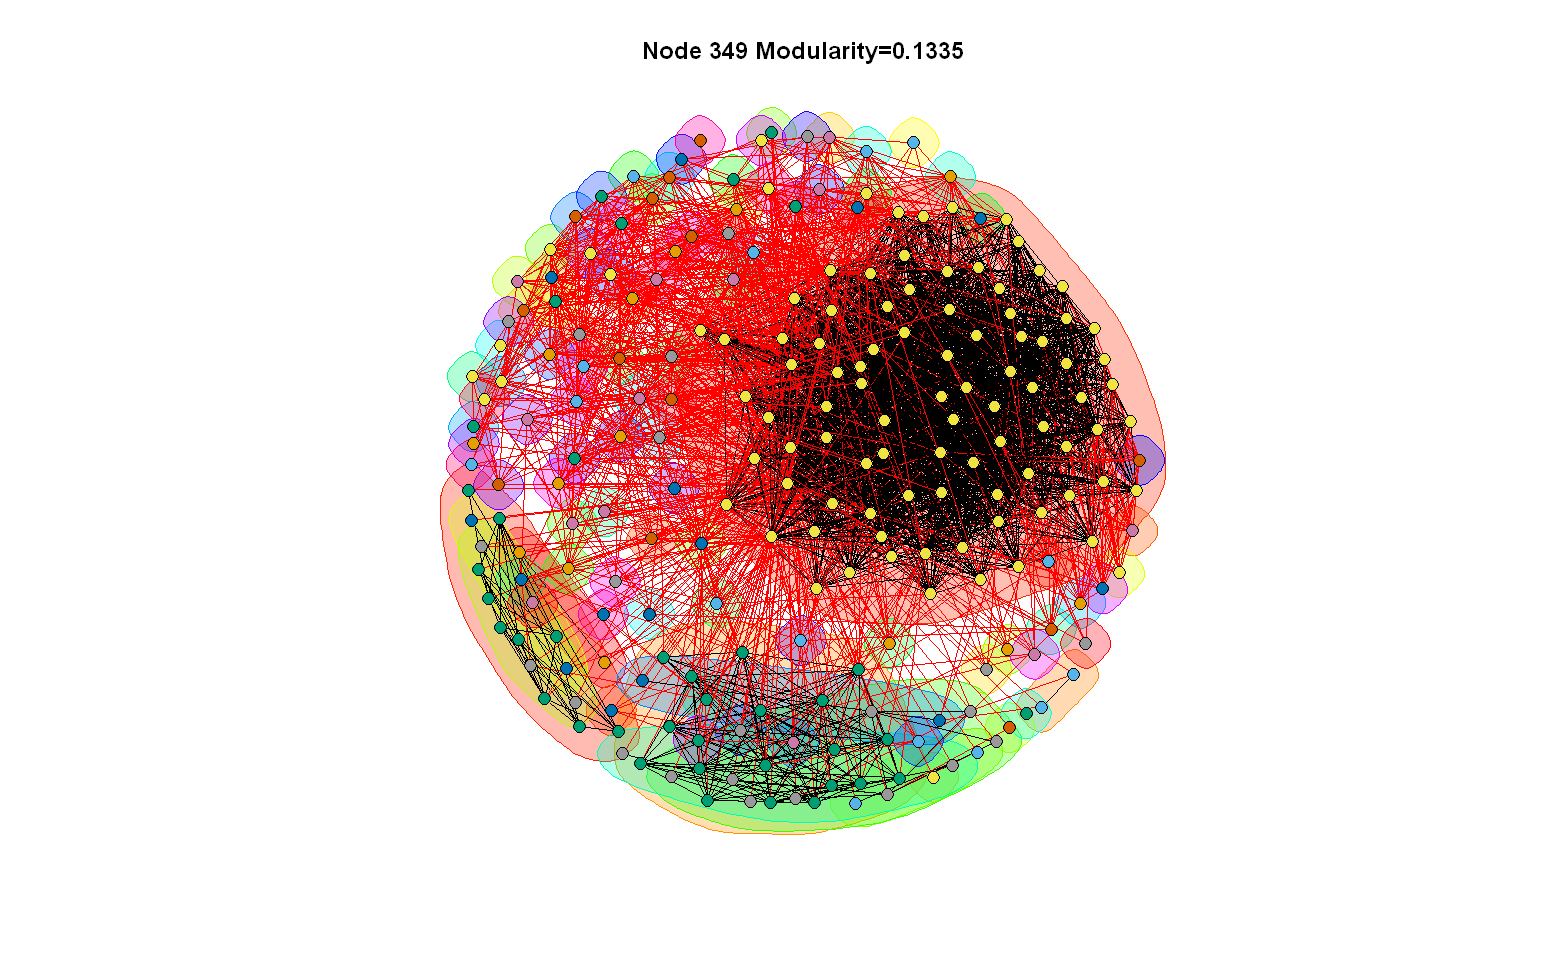

[1] "images\\Question8_349_infomap_.png"


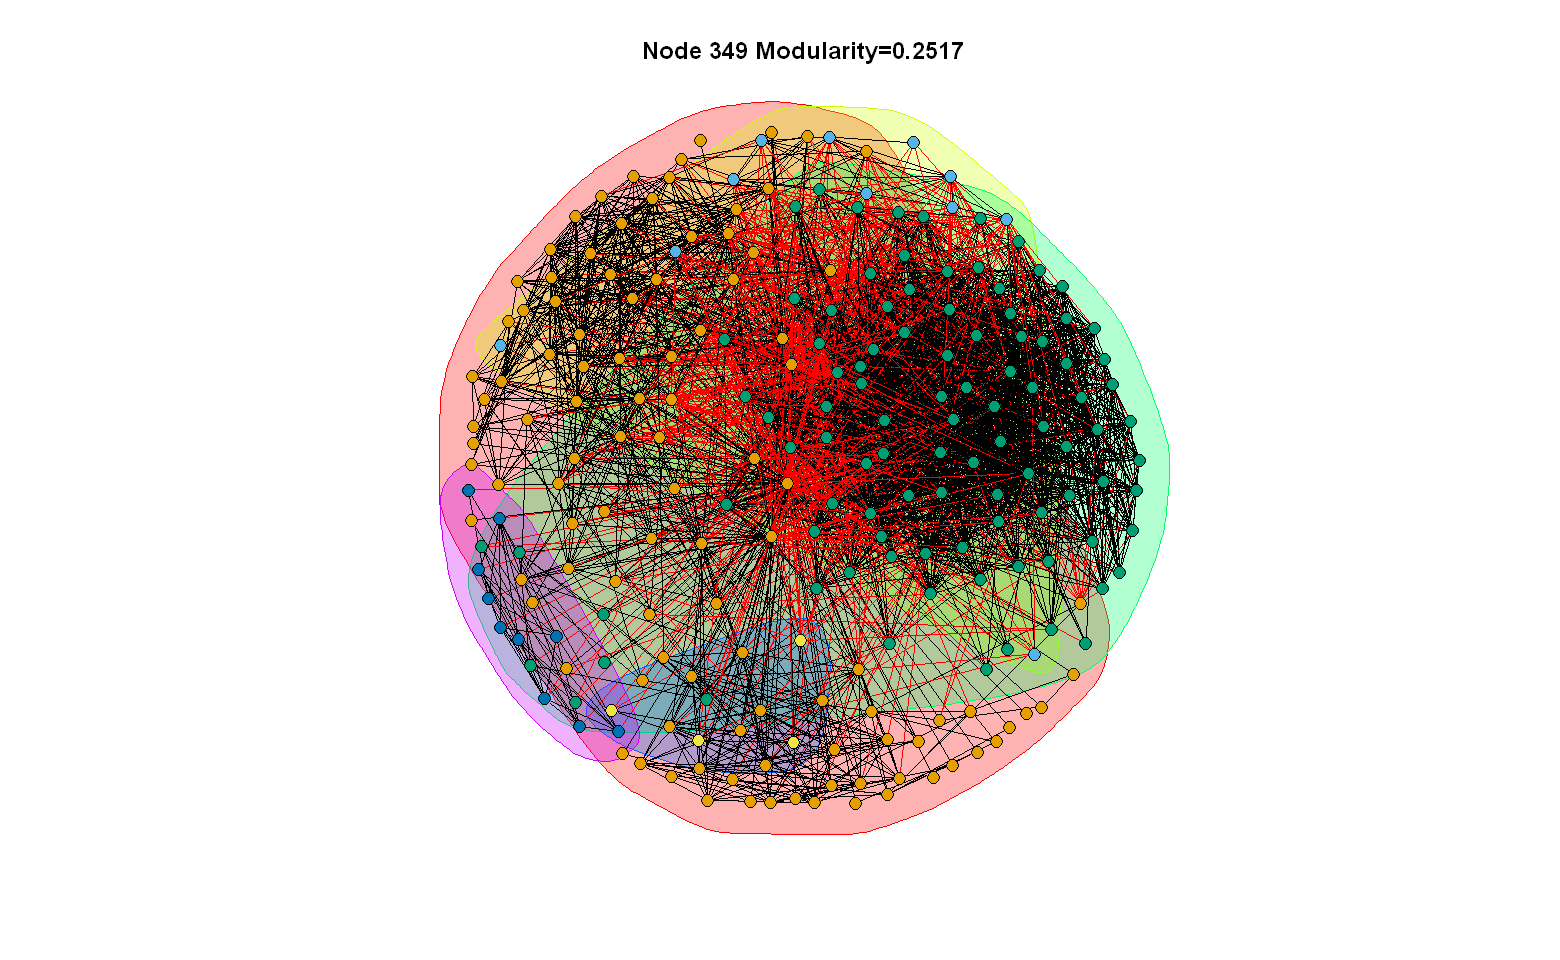

[1] "images\\Question8_484_edgebtw_.png"


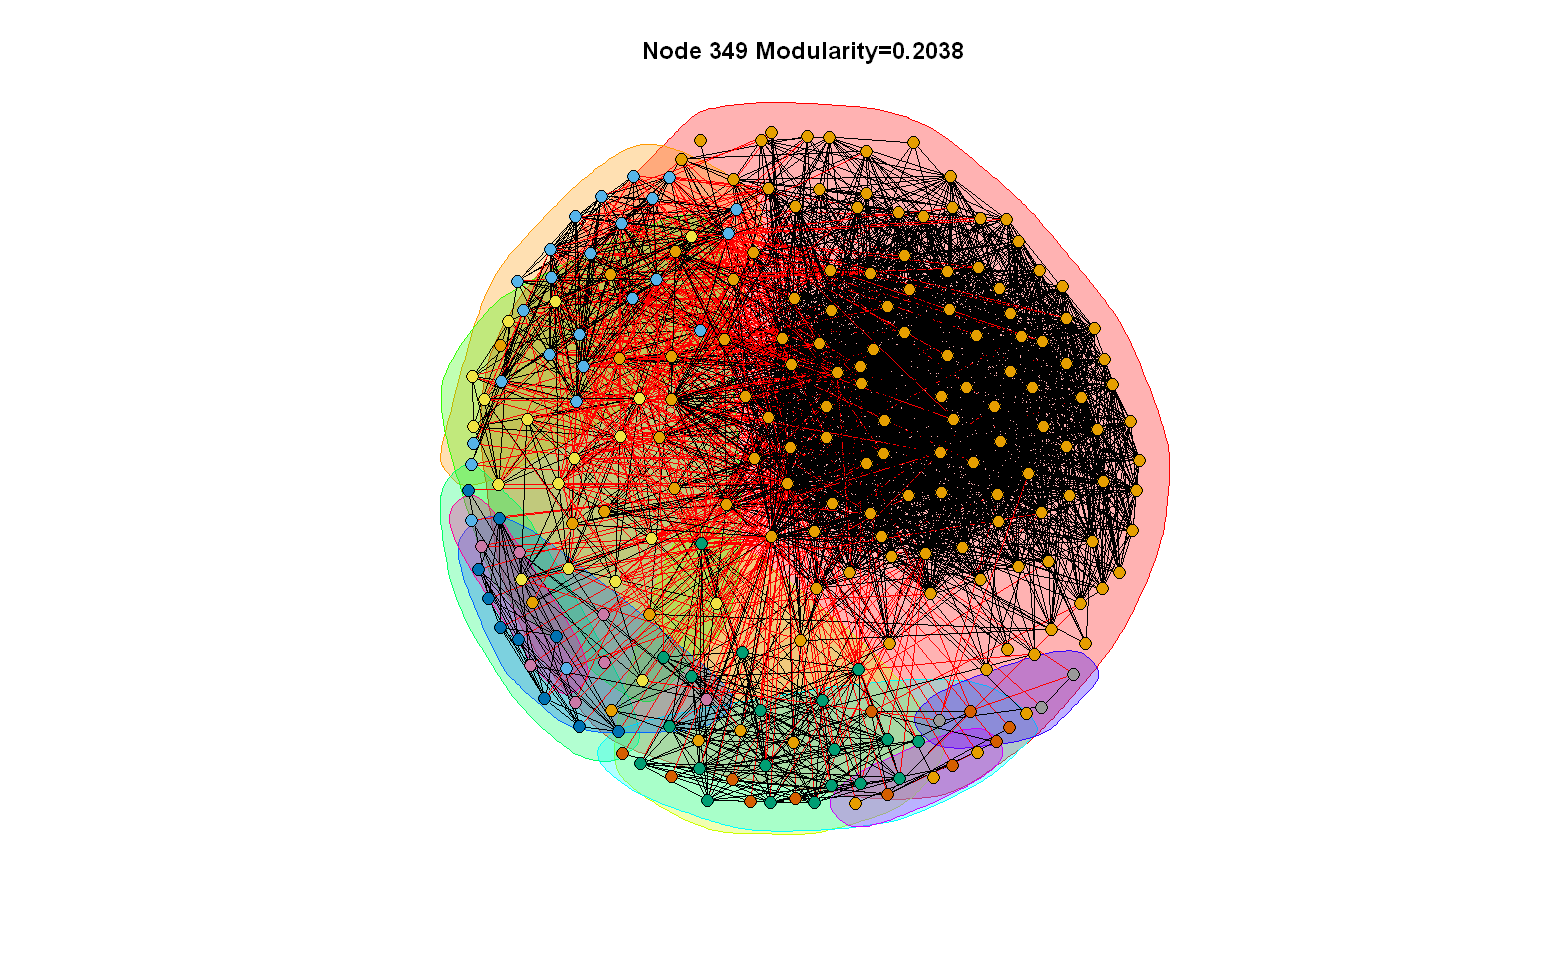

[1] "images\\Question8_484_fastgreedy_.png"


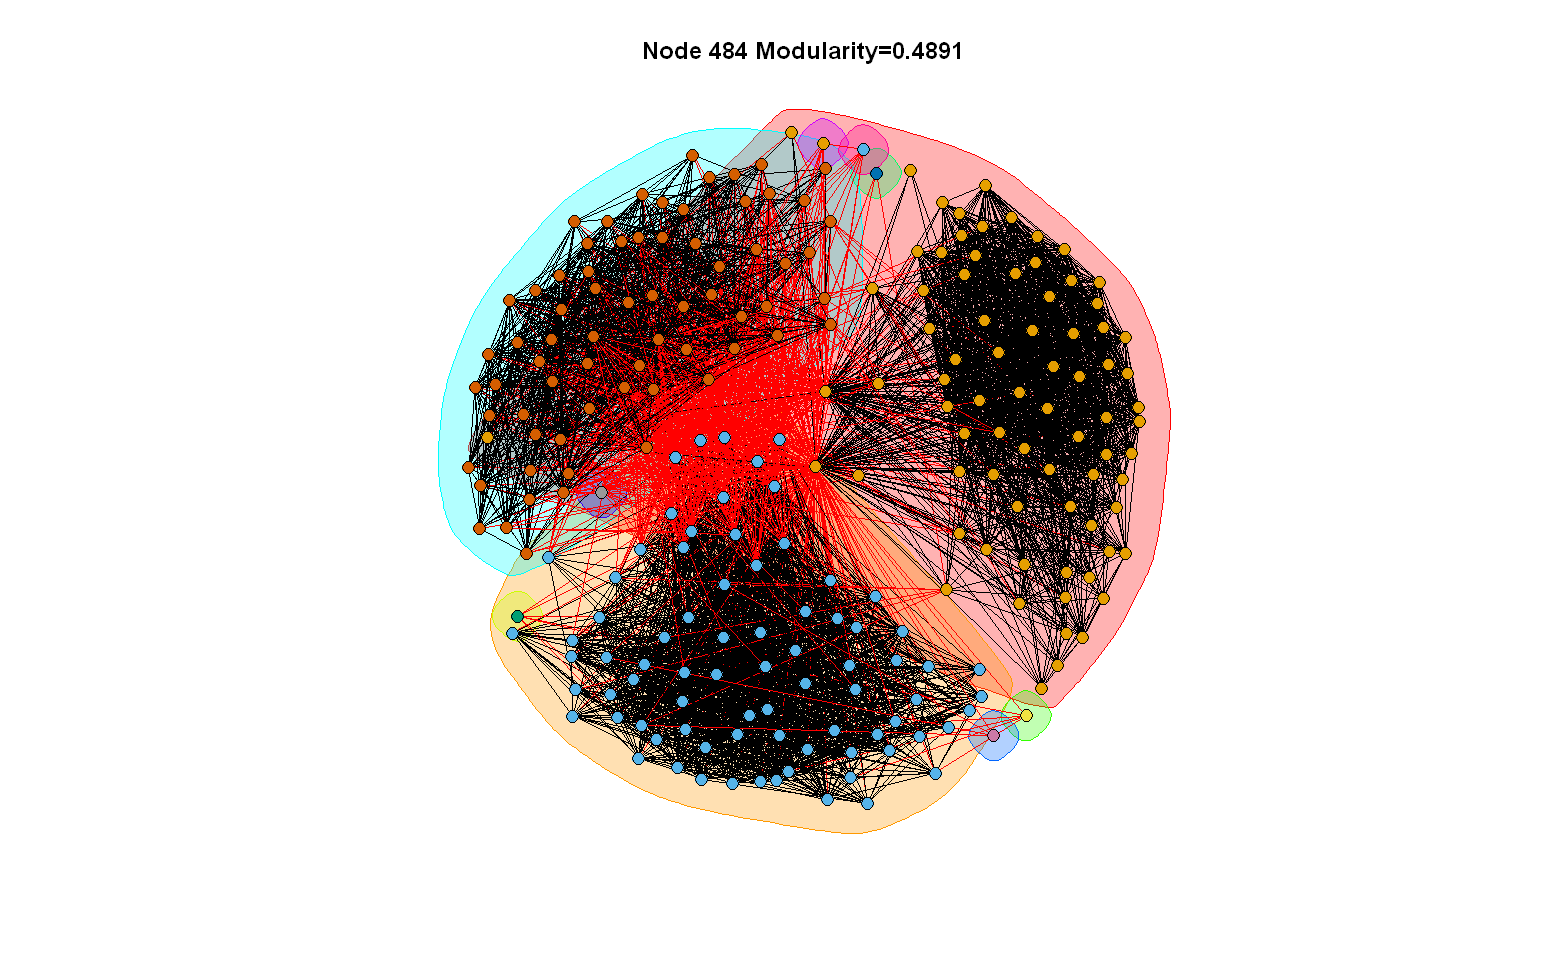

[1] "images\\Question8_484_infomap_.png"


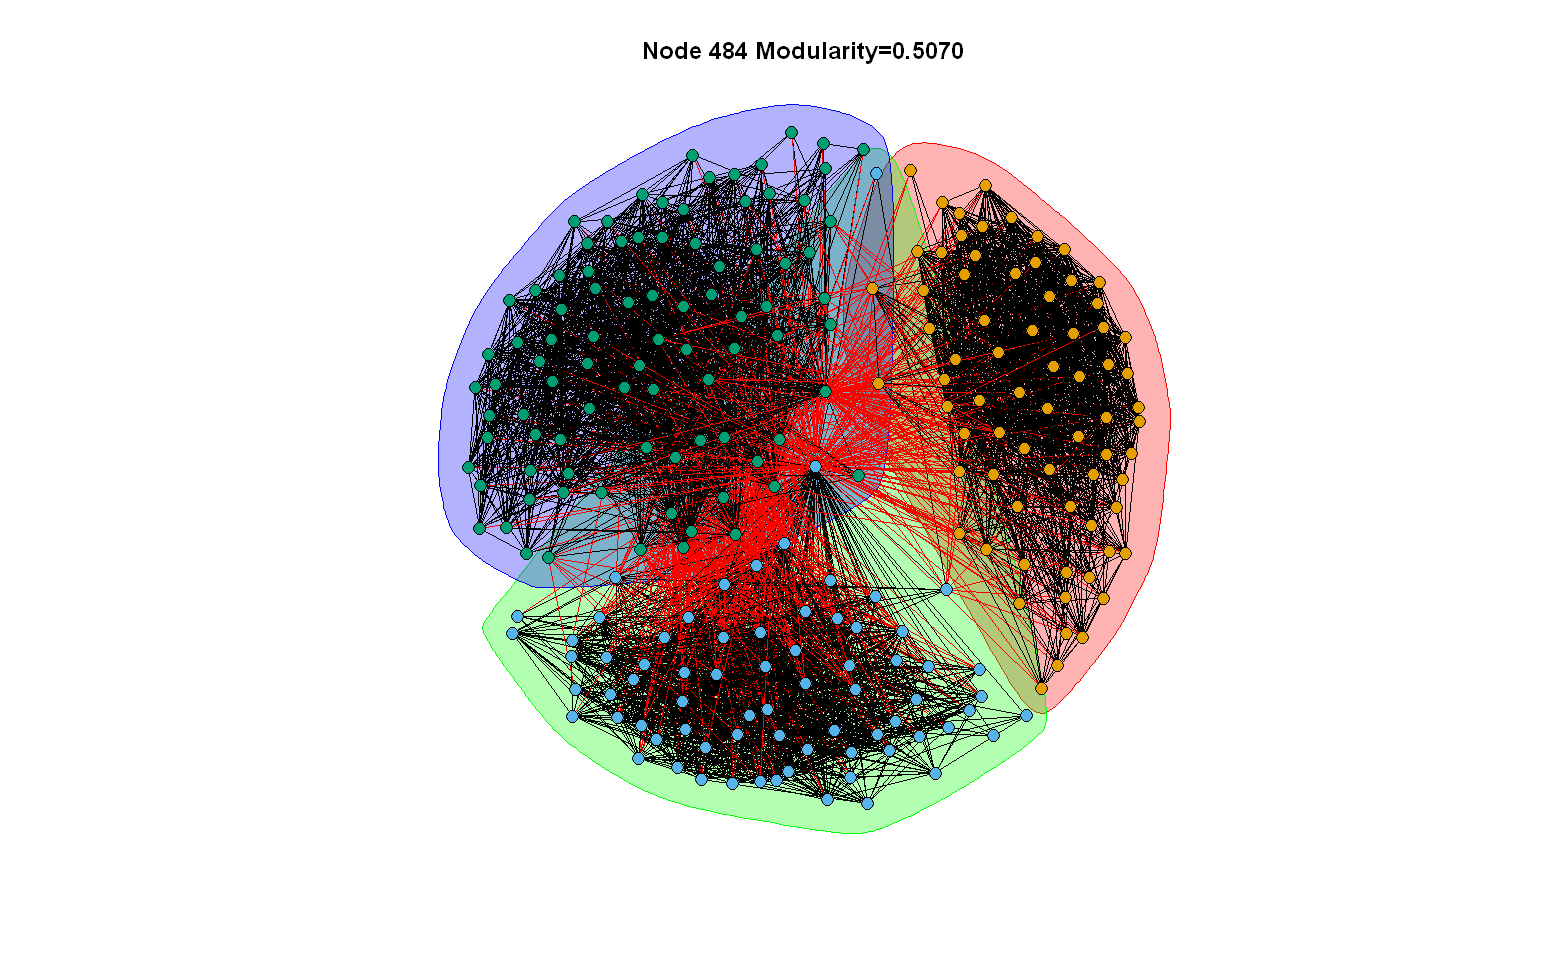

[1] "images\\Question8_1087_edgebtw_.png"


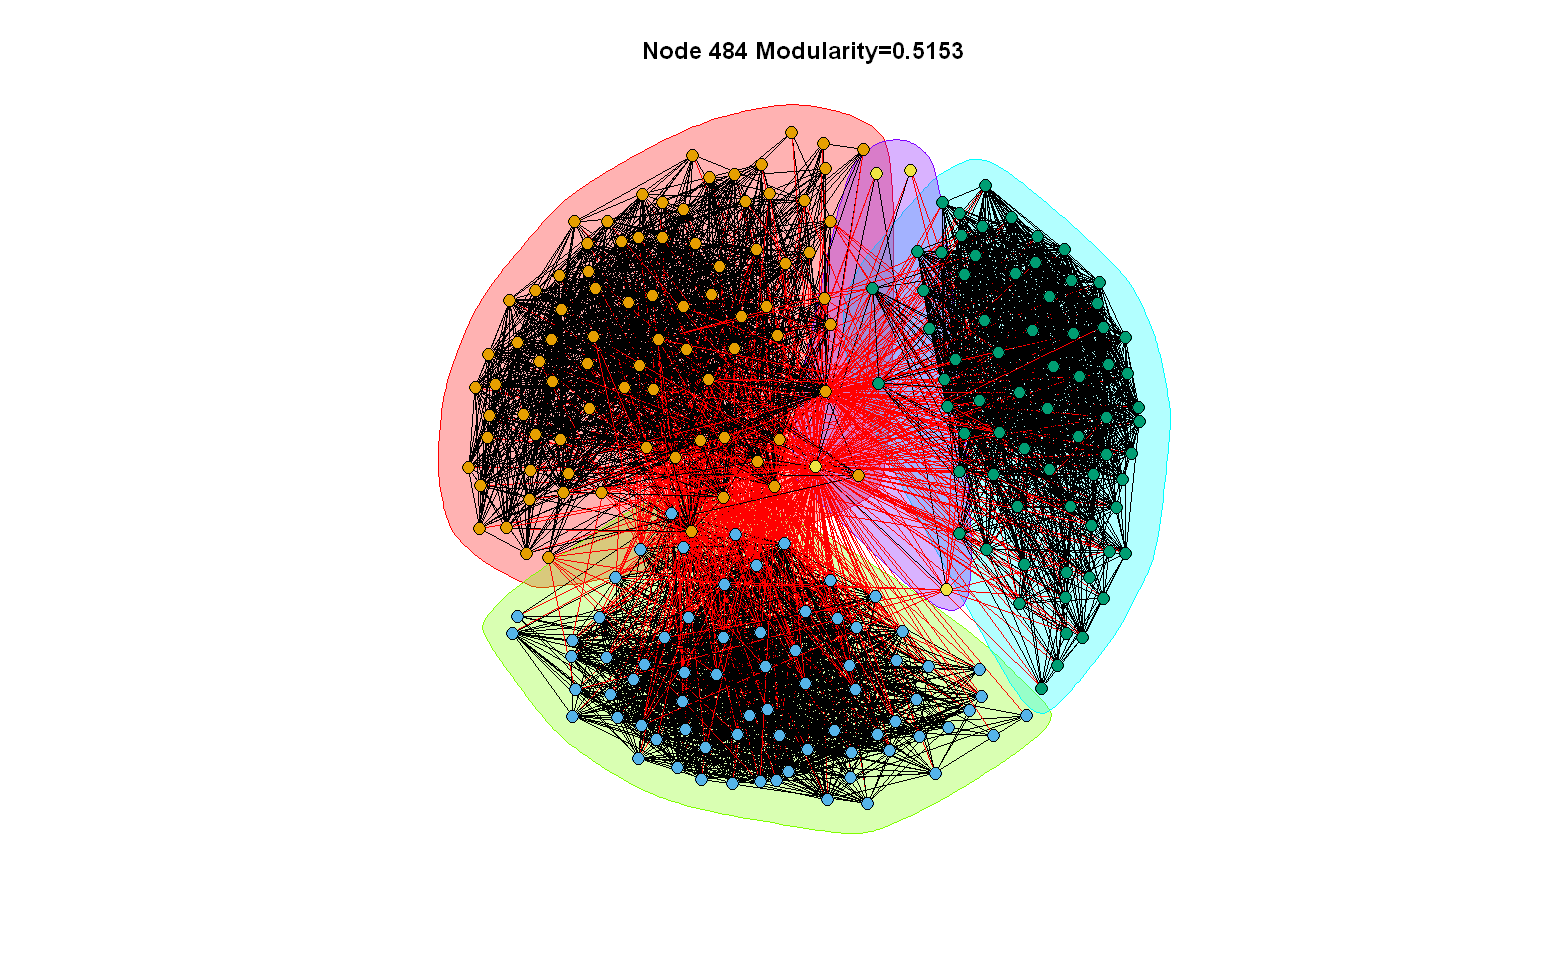

[1] "images\\Question8_1087_fastgreedy_.png"


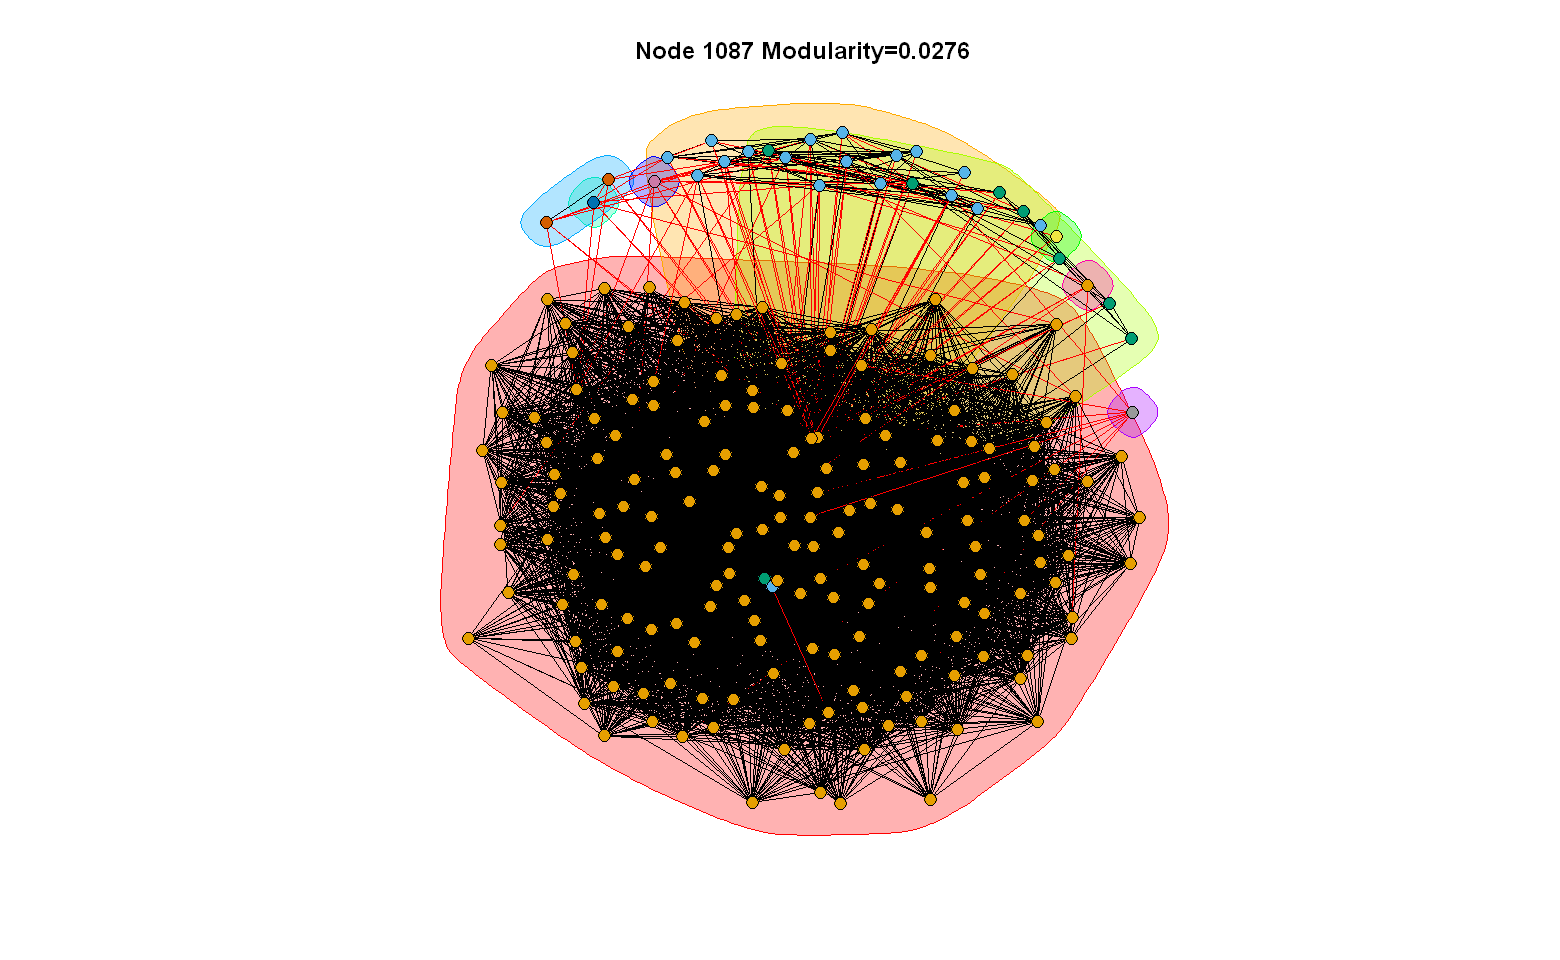

[1] "images\\Question8_1087_infomap_.png"


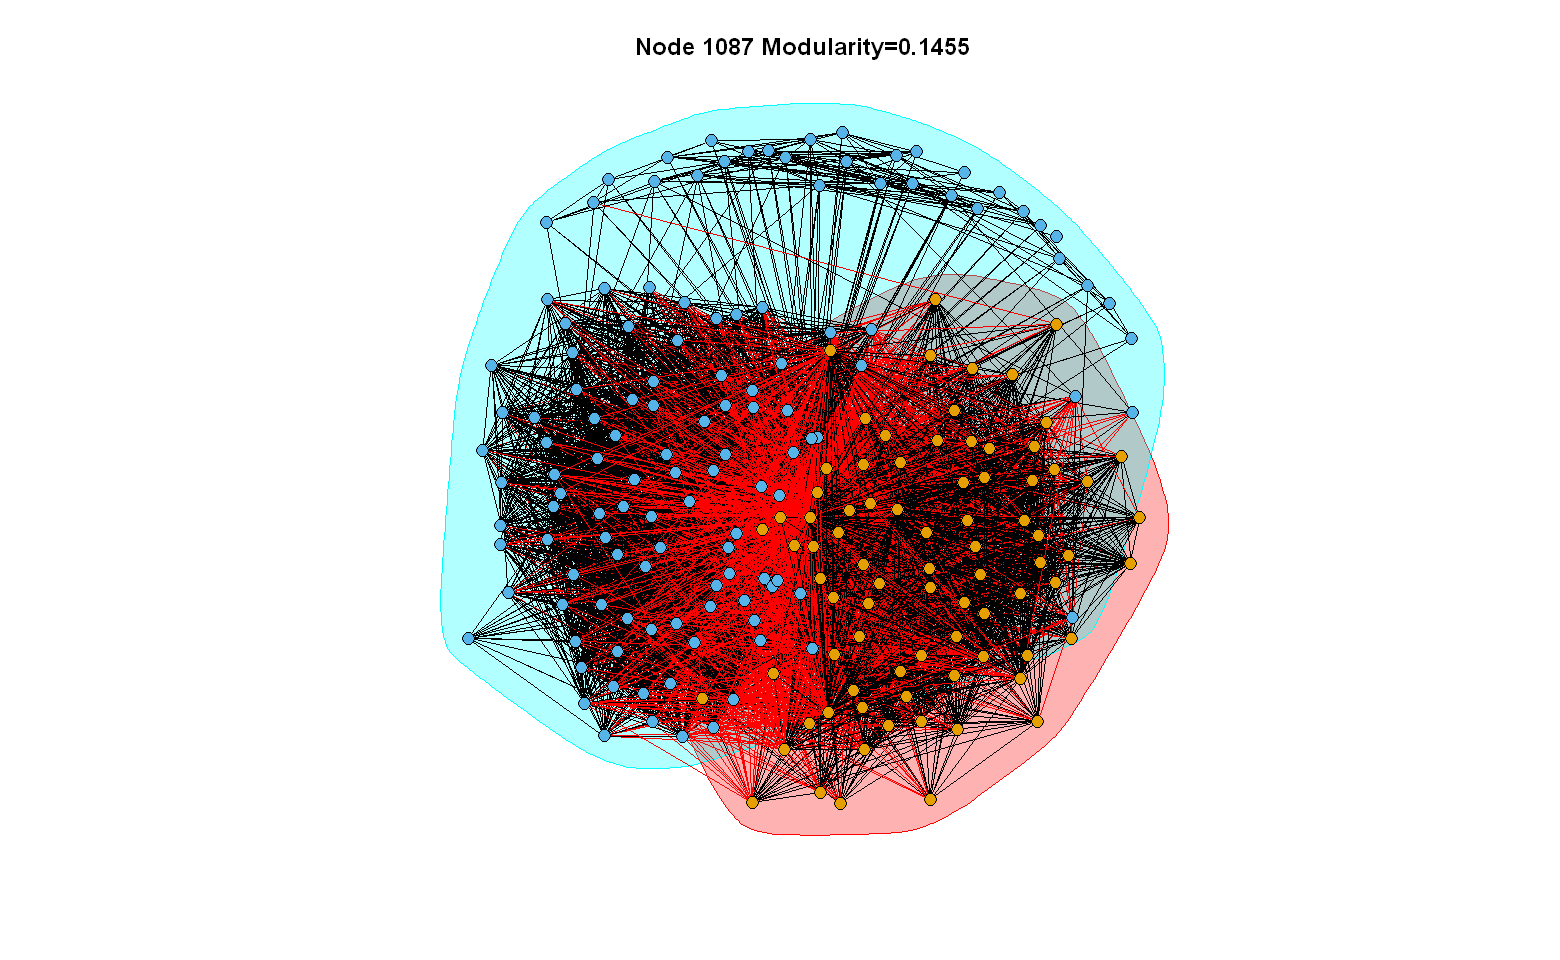

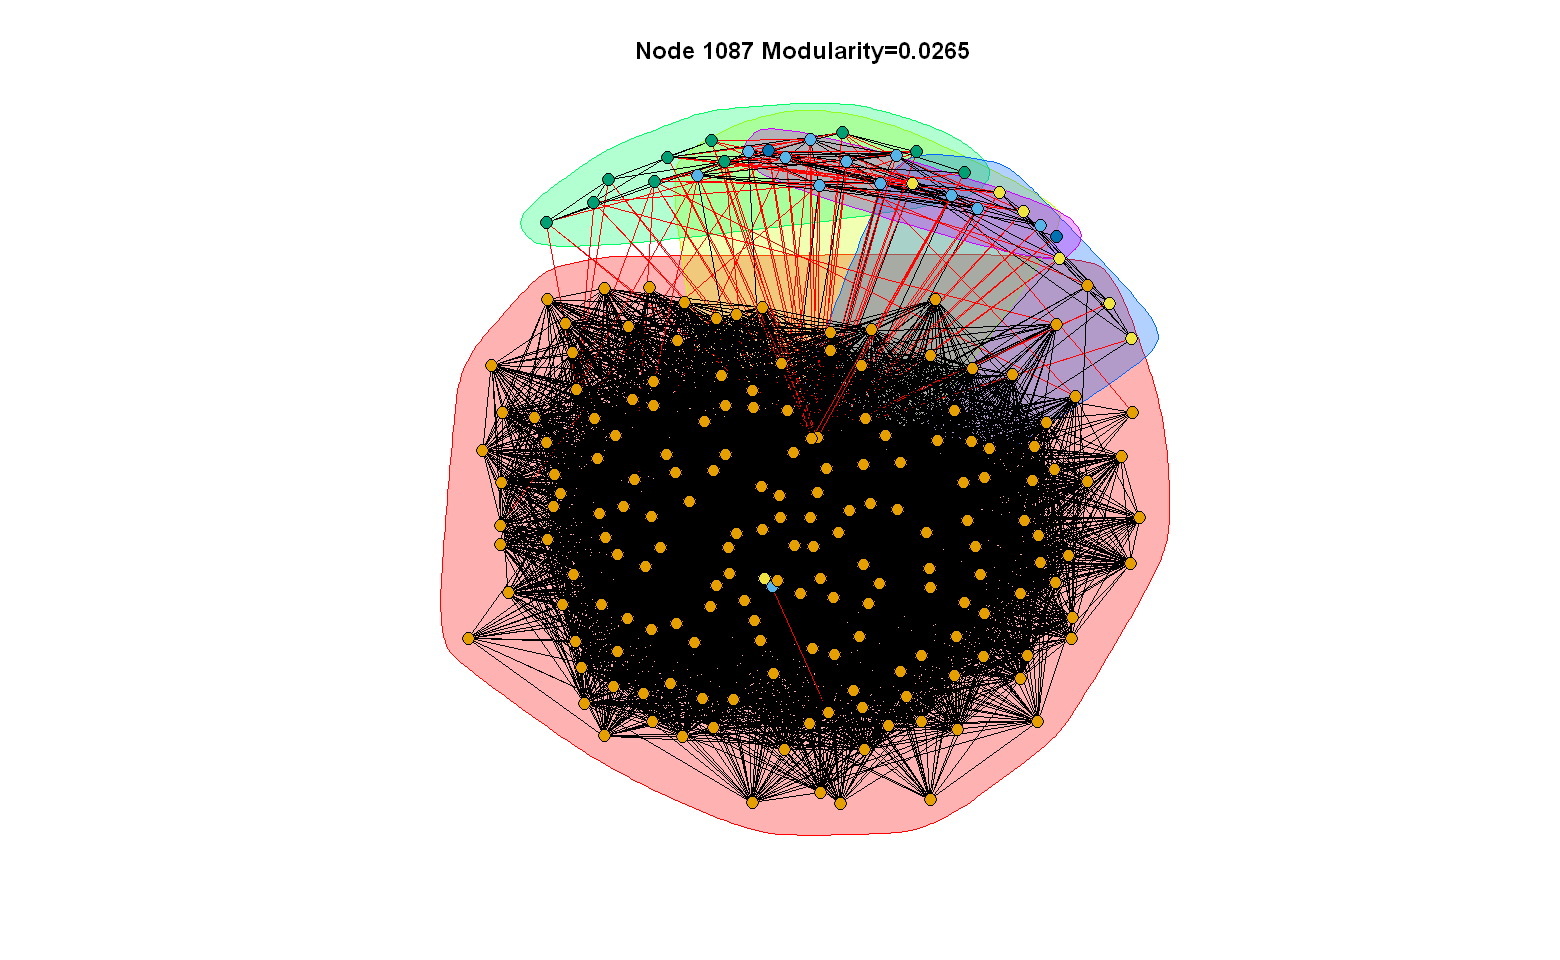

In [24]:
modularity_matrix <- matrix(nrow = length(node_ids), 
                            ncol = 3,
                           dimnames = list(node_ids,
                               c("edgebtw","fastgreedy","infomap")))
for (i in seq_along(node_ids)){
    n_id <- node_ids[i]
    subset = c(n_id,neighbors(g_fb,n_id))
    g_subset <- induced_subgraph(g_fb,
                             subset)
                            
    
    
    clusterings <- list(list("edgebtw",cluster_edge_betweenness(g_subset)),
                        list("fastgreedy",cluster_fast_greedy(g_subset)),
                        list("infomap",cluster_infomap(g_subset)))
    
    layout = layout_with_kk(g_subset)

    for (clust in clusterings){
        mod <- modularity(clust[[2]])
        modularity_matrix[i,clust[[1]]] <- mod

        filename <- paste("images\\Question8",n_id,clust[1],".png",sep="_")
        print(filename)

        plot(clust[[2]], g_subset,layout=layout,target=filename,vertex.label=NA,vertex.size=4,margin=c(0,0,0,0),main=sprintf("Node %d Modularity=%.4f",n_id,mod))
        dev.copy(png,filename,width = 800, height = 800)
        dev.off()
        }
}

In [25]:
modularity_matrix

,edgebtw,fastgreedy,infomap
1,0.35330217,0.4131014,0.38911847
108,0.50675492,0.4359294,0.50822334
349,0.13352802,0.2517149,0.20375300
484,0.48909518,0.5070016,0.51527875
1087,0.02762377,0.1455315,0.02651616


### Question 9

In [26]:
node_ids <- c(1,108,349,484,1087)

In [ ]:
modularity_matrix <- matrix(nrow = length(node_ids), 
                            ncol = 3,
                           dimnames = list(node_ids,
                               c("edgebtw","fastgreedy","infomap")))
for (i in seq_along(node_ids)){
    n_id <- node_ids[i]
    subset = neighbors(g_fb,n_id)
    g_subset <- induced_subgraph(g_fb,
                             subset)
                            
    layout = layout_with_kk(g_subset)

    
    clusterings <- list(list("edgebtw",cluster_edge_betweenness(g_subset)),
                        list("fastgreedy",cluster_fast_greedy(g_subset)),
                        list("infomap",cluster_infomap(g_subset)))
                        
    for (clust in clusterings){
        mod <- modularity(clust[[2]])
        modularity_matrix[i,clust[[1]]] <- mod

        filename <- paste("images\\Question9",n_id,clust[1],".png",sep="_")
        dev.copy(png,filename,width = 800, height = 800)
        print(filename)
        plot(clust[[2]], g_subset,layout=layout,target=filename,vertex.label=NA,vertex.size=4,margin=c(0,0,0,0),main=sprintf("Node %d Modularity=%.4f",n_id,mod))
        dev.off()
    }
}

In [ ]:
modularity_matrix

### Question 10